In [1]:
import numpy as np
import hFEMs as hs
import importlib
importlib.reload(hs);
# dir(hs)

In [3]:
pairs = [(0,9),(1,8)]
CL = np.array([[1,0,0,0,0,0,0,0,0,0]],dtype=np.float)
dL = np.array([42],dtype=np.float)
solvable = hs.TestSolvable(pairs, CL, dL)
ns = hs.NewtonSolver(solvable)
print(solvable.grad(np.zeros(10,)))
print(ns.test(10))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [3]:
ns

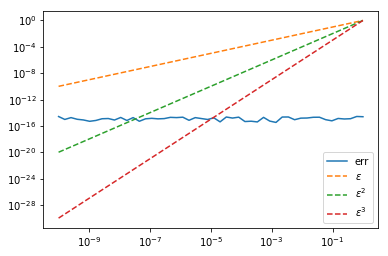

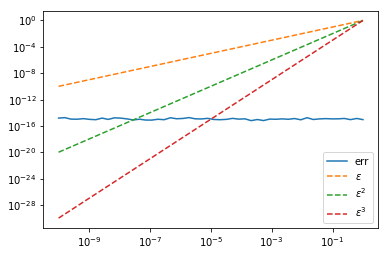

In [12]:
# TO GRADIENT TESTING MODULE

%matplotlib inline
import matplotlib.pyplot as plt

def test_gradients(fun_val, fun_grad, q, dq, eps):
    fL = fun_val(q - eps * dq)
    fR = fun_val(q + eps * dq)
    dfdq = fun_grad(q)
    err = (fR - fL) - (2*eps * dfdq@dq)
    err = np.abs(err).max()
    return err

def plot_err(fun_val, fun_grad, ndims, epss, ndirs=1):
    q = np.random.uniform(-1,1,(ndims,))
    
    errs = np.empty((len(epss)),dtype=np.float)
    for k,eps in enumerate(epss):
        errmax = 0
        for i in range(ndirs):
            dq = np.random.uniform(-1,1,(ndims,))
            dq /= np.linalg.norm(dq)
            errmax = max(errmax, test_gradients(fun_val, fun_grad, q, dq, eps))
        errs[k] = errmax
    
    plt.plot(epss,errs,label="err")
    plt.plot(epss,epss,"--",label=r"$\varepsilon$")
    plt.plot(epss,epss**2,"--",label=r"$\varepsilon^2$")
    plt.plot(epss,epss**3,"--",label=r"$\varepsilon^3$")
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()

pairs = [(0,9),(1,8)]
CL = np.array([[1,0,0,0,0,0,0,0,0,0]],dtype=np.float)
dL = np.array([42],dtype=np.float)
tst = hs.TestSolvable(pairs, CL, dL)

plot_err(tst.val, tst.grad, ndims=10, epss=np.logspace(-10,0,50), ndirs=3)
plot_err(tst.grad, tst.hess, ndims=10, epss=np.logspace(-10,0,50), ndirs=3)